<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipynb``, к примеру -- ``ivanov_401_task1.ipynb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

AUC-ROC используется для сравнения различных моделей бинарной классификации -- чем больше значение к 1, тем лучше классификатор.

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

В случае несбалансированных классов precision/recall предпочтительнее, так как AUC-ROC зависит от TPR и FPR, которые очень сильно зависят от баланса классов.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

Внутренние критерии оценивает метод по обучающей выборке, такие критерии нужны для настройки параметров алгоритма в процессе обучения.
Внешние критерии оценивают метод по тестовой выборке, они нужны для оценки качества алгоритма на новых данных.

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Эмпирические критерии зависят от данных, а аналитические от структуры модели.

**Вопрос 5**: Что такое критерий регуляризации?

Этот критерий вводится, когда много различных наборов параметров доставляют минимум оптимизируемому функционалу, он дает некоторое ограничение на эти параметры, чтобы итоговый выбранный алгоритм обладал хорошей обобщающей способностью.

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [2]:
import pandas
import matplotlib.pyplot as plt
import urllib2
import numpy as np

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X.shape

(4601, 57)

In [4]:
len(y[y == 1]) / float(len(y))

0.39404477287546186

**Задание**
- Сколько примеров писем в датасете? 4601
- Какова доля плохих писем?  39.4%
- Какие характерные группы признаков представлены в наборе? частоты определенных слов; частоты определенных символов; признаки, связанные с заглавными буквами.

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

In [5]:
X_train, X_test, y_train, y_test = X[:3000], X[3000:], y[:3000], y[3000:]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score

In [11]:
def print_metrics(y_true, y_pred):
    print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
    print("Precision: " + str(precision_score(y_true, y_pred)))
    print("Recall: " + str(recall_score(y_true, y_pred)))
    print("F1-score: " + str(f1_score(y_true, y_pred)))

In [12]:
def get_precision_recall(clf, X, y_true):
    probs = map(lambda x: x[1], clf.predict_proba(X))
    
    precisions, recalls, tresholds = precision_recall_curve(y_true, probs)
    return precisions, recalls, tresholds

In [13]:
def get_roc(clf, X, y_true):
    probs = map(lambda x: x[1], clf.predict_proba(X))
    fprs, tprs, tresholds = roc_curve(y_true, probs)
    auc = roc_auc_score(y_true, probs)
    return fprs, tprs, tresholds, auc

In [14]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print_metrics(y_test, y_pred_tree)

Accuracy: 0.767020612117
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Поскольку исходная выборка была отсортирована, то в первые 3000 объектов попали все имеющиеся 1813 объектов 1 класса. Значит на тесте не было ни одного объекта 1 класса, отсюда и TP = 0 и следовательно 3 метрики обнулились.

Перемешаем выборку:

In [6]:
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]
X_train, X_test, y_train, y_test = X[:3000], X[3000:], y[:3000], y[3000:]

In [16]:
precision_recall_curves = []
roc_curves = []

In [17]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print_metrics(y_test, y_pred_tree)
precisions, recalls, tresholds = get_precision_recall(clf_tree, X_test, y_test)
fprs, tprs, tresholds, auc = get_roc(clf_tree, X_test, y_test)
precision_recall_curves.append((precisions, recalls, tresholds, 'tree'))
roc_curves.append((fprs, tprs, tresholds, auc, 'tree'))

Accuracy: 0.908806995628
Precision: 0.907523510972
Recall: 0.869369369369
F1-score: 0.888036809816


Выделим наиболее важные признаки:

In [18]:
top_feature_indices = np.argsort(clf_tree.feature_importances_)[:-10:-1]
print(spam_data.columns[top_feature_indices])

Index([u'char_freq_$', u'word_freq_remove', u'char_freq_!', u'word_freq_hp',
       u'word_freq_free', u'word_freq_george', u'word_freq_edu',
       u'word_freq_money', u'capital_run_length_total'],
      dtype='object')


Лучшая константная модель на тесте дает следующее качество:

In [19]:
print_metrics(np.zeros(len(y_test)), y_test)
precisions, recalls, tresholds = precision_recall_curve(y_test, np.zeros(len(y_test)))
fprs, tprs, tresholds = roc_curve(y_test, np.zeros(len(y_test)))
auc = roc_auc_score(y_test, np.zeros(len(y_test)))
precision_recall_curves.append((precisions, recalls, tresholds, 'const'))
roc_curves.append((fprs, tprs, tresholds, auc, 'const'))

Accuracy: 0.584009993754
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Натренируем KNN:

In [20]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_metrics(y_test, y_pred_knn)
precisions, recalls, tresholds = get_precision_recall(knn, X_test, y_test)
fprs, tprs, tresholds, auc = get_roc(knn, X_test, y_test)
precision_recall_curves.append((precisions, recalls, tresholds, 'knn'))
roc_curves.append((fprs, tprs, tresholds, auc, 'knn'))

Accuracy: 0.779512804497
Precision: 0.802707930368
Recall: 0.623123123123
F1-score: 0.701606086221


Отмасштабируем признаки:

In [7]:
X = X / np.mean(X, axis=0)
X = X[indices]
y = y[indices]
X_train, X_test, y_train, y_test = X[:3000], X[3000:], y[:3000], y[3000:]

Натренируем еще раз knn

In [22]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_metrics(y_test, y_pred_knn)
precisions, recalls, tresholds = get_precision_recall(knn, X_test, y_test)
fprs, tprs, tresholds, auc = get_roc(knn, X_test, y_test)
precision_recall_curves.append((precisions, recalls, tresholds, 'knn_scaled'))
roc_curves.append((fprs, tprs, tresholds, auc, 'knn_scaled'))

Accuracy: 0.89506558401
Precision: 0.899480069324
Recall: 0.825119236884
F1-score: 0.860696517413


Натренируем еще раз decision tree

In [23]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print_metrics(y_test, y_pred_tree)
precisions, recalls, tresholds = get_precision_recall(clf_tree, X_test, y_test)
fprs, tprs, tresholds, auc = get_roc(clf_tree, X_test, y_test)
precision_recall_curves.append((precisions, recalls, tresholds, 'tree_scaled'))
roc_curves.append((fprs, tprs, tresholds, auc, 'tree_scaled'))

Accuracy: 0.912554653342
Precision: 0.915110356537
Recall: 0.856915739269
F1-score: 0.885057471264


Видно, что у KNN выросло качество.Наверное, это потому что на расстояния между объектами влияет масштаб признаков: по одной координате расстояние 100 между объектами может быть большим, а по другой маленьким.Расстояния по разным координатам тогда несравнимы между собой, а когда мы их складываем мы забываем про это различие в значениях и метрики между разными объектами хуже отражают их принадлежности к разным классам. А когда мы нормируем значения координат на средние, то все значения признаков становятся одного порядка и их уже можно сравнивать между собой, соответственно расстояния получаются более интерпретируемые.
В решающих деревьях масштабы признаков не играют роли, поскольку в каждом узле мы делаем разбиение только по одному признаку, а при выборе признака мы учитываем только информативность разбиения, на которую не влияет масштаб -- при нормировке пороги разбиений тоже отнормируются.

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

**<Решение>**

Рассмотрим бинарный классификатор b, который возвращает в качестве ответа уверенность в принадлежности ответа к классу +1 ( чем больше число, тем больше уверенность). Рассмотрим объекты, отсортированные по возрастанию ответов b: $x_{(1)} ... x_{(n)}$ и правильные ответы на этих объектах, отсортированные таким же образом: $y_{(1)} ... y_{(n)}$ Тогда функционал "доля дефектных пар" это: 
$DP = \frac{2}{n(n-1)} \sum \limits_{i < j} I(y_{(i)} > y_{(j)})$ 

Пусть $l_{+}$ и $l_{-}$ -- количество объектов класса 1 и 0 в выборке соответственно.
Рассмотрим процесс построения ROC-кривой. Всего у нас есть n+1 порог, дающий различные TPR и FPR. Будем перебирать их начиная c $b(x_{(n)})$ (дает точку (0, 0)) до $b(x_{(0)})$ (дает точку (1, 1)). При уменьшении порога с $b(x_{(k+1)})$ до $b(x_{(k)})$, если $y_{(k)}$ было 1, то TPR увеличится на $\frac{1}{l_{+}}$ и площадь не поменяется, а если  $y_{(k)}$ было 0, то FPR увеличится на $\frac{1}{l_{-}}$ и площадь возрастет на площадь одного "столбика": $\frac{1}{l_{+}}\cdot \sum \limits_{i=k}^{n} I(y_{(i)} = 1) \cdot \frac{1}{l_{-}}I(y_{(k)} = 0)$. Итого получаем площадь под ROC кривой:

$AUC = \sum \limits_{k=1}^{n} \frac{1}{l_{+}}\cdot \sum \limits_{i=k}^{n} I(y_{(i)} = 1) \cdot \frac{1}{l_{-}}I(y_{(k)} = 0) = \frac{1}{l_{+}l_{-}} \sum \limits_{k < i} I(y_{(i)} > y_{(k)}) = \frac{1}{l_{+}l_{-}} \sum \limits_{k < i} 1 - I(y_{(i)} < y_{(k)}) - I(y_{(i)} = y_{(k)}) = \frac{C_{n}^{2} - C_{l_{+}}^{2} - C_{l_{-}}^{2}}{l_{+}l_{-}} - \frac{C_{n}^{2}}{l_{+}l_{-}}DP = 1 - \frac{C_{n}^{2}}{l_{+}l_{-}}DP$.


**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.


**<Решение>**

Рассмотрим алгоритм, который выдает константу, тогда при пороге больше константы будет точка (1, 1), а при меньше константы будет (0, 0), таким образом AUC будет 0.5

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
Для KNN это доля соседей принадлежащих классу из k ближайших. Порог в этом случае 1/2.
Для решающего дерева это отношение количества объектов положительного класса ко всем объектам в листе, в который попал рассматриваемый объект. Порог тоже 1/2.
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



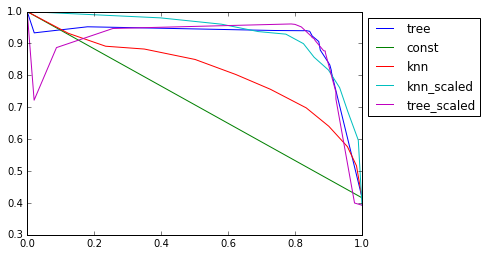

Max recall if precision >= 90%: 0.870870870871


In [32]:
max_recall_90 = 0
# precision-recall
for curve in precision_recall_curves:
    precisions, recalls, tresholds, label = curve
    curr_max_recall = max(recalls[precisions >= 0.9])
    if curr_max_recall > max_recall_90:
        max_recall_90 = curr_max_recall
    plt.plot(recalls, precisions, label=label)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
print("Max recall if precision >= 90%: " + str(max_recall_90))

AUC-ROC tree: 0.927825151355
AUC-ROC const: 0.5
AUC-ROC knn: 0.866328628093
AUC-ROC knn_scaled: 0.951780211584
AUC-ROC tree_scaled: 0.926814886782


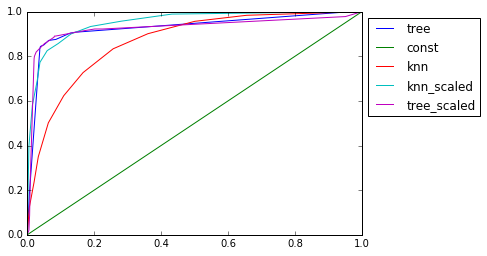

In [28]:
# roc
for curve in roc_curves:
    fprs, tprs, tresholds, auc, label = curve
    print("AUC-ROC " + label + ": " + str(auc))
    plt.plot(fprs, tprs, label=label)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидации, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

Выберем метод кросс-валидации K-Fold

In [43]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [44]:
splitter = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
cv_data = list(splitter.split(X_train, y_train))

In [45]:
criteria = ['gini', 'entropy']
max_depths = [5, 7, 10, 30, None]
num_features = ['sqrt', 'log2', None]
param_grid = {'criterion': criteria, 'max_depth': max_depths, 'max_features': num_features}

In [46]:
def scorer(estimator, X, y):
    y_scores = estimator.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_scores)

In [47]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scorer, n_jobs=4, cv=cv_data)
grid_search = grid_search.fit(X_train, y_train)

In [48]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_probs))

0.94755669612


In [52]:
n_neighbors = [1, 3, 5, 7]
metrics = ['manhattan', 'euclidean', 'chebyshev']
weights = ['uniform', 'distance']
param_grid = {'n_neighbors': n_neighbors, 'metric': metrics, 'weights': weights}

In [53]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scorer, n_jobs=4, cv=cv_data)
grid_search = grid_search.fit(X_train, y_train)

In [54]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [55]:
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_probs))

0.970380955158


<h1 align="center">Примеры</h1> 

## Обучение решающего дерева

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [4]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

3 petal width (cm), importance = 0.95
2 petal length (cm), importance = 0.05
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

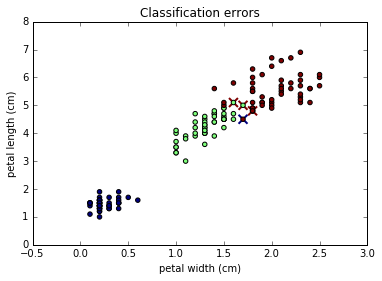

In [5]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [7]:
!dot -Tpng tree.dot -o tree.png

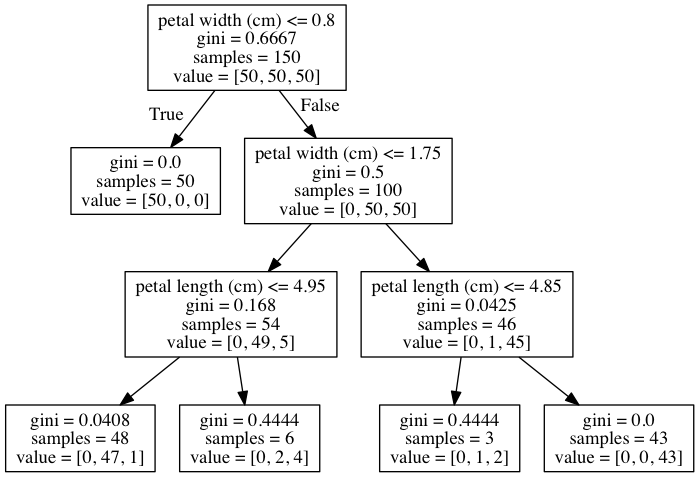

In [8]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [9]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [10]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [12]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 390 ms, sys: 23 ms, total: 413 ms
Wall time: 461 ms


#### График, демонстрирующий оптимальность выбора числа соседей

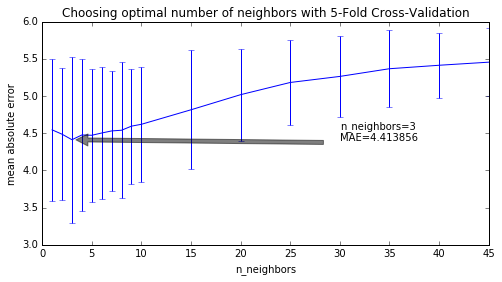

In [13]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))